In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
iris = pd.read_csv("/Users/shruti/Documents/Projects/EDA/dataset/Iris.csv")
print(iris.shape)

(150, 6)


In [50]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [51]:
iris = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']]
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [52]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

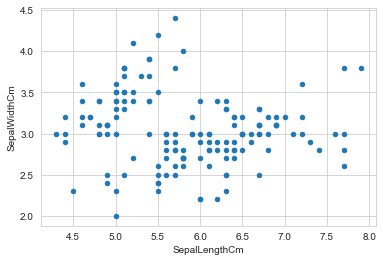

In [53]:
iris.plot(kind = 'scatter', x='SepalLengthCm', y='SepalWidthCm')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


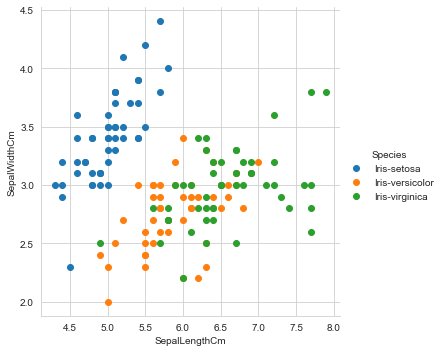

In [54]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue="Species", size=5)\
.map(plt.scatter, "SepalLengthCm", "SepalWidthCm")\
.add_legend()

In [55]:
# setosa can separated from versicolor and virginica from above using linearly separated

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


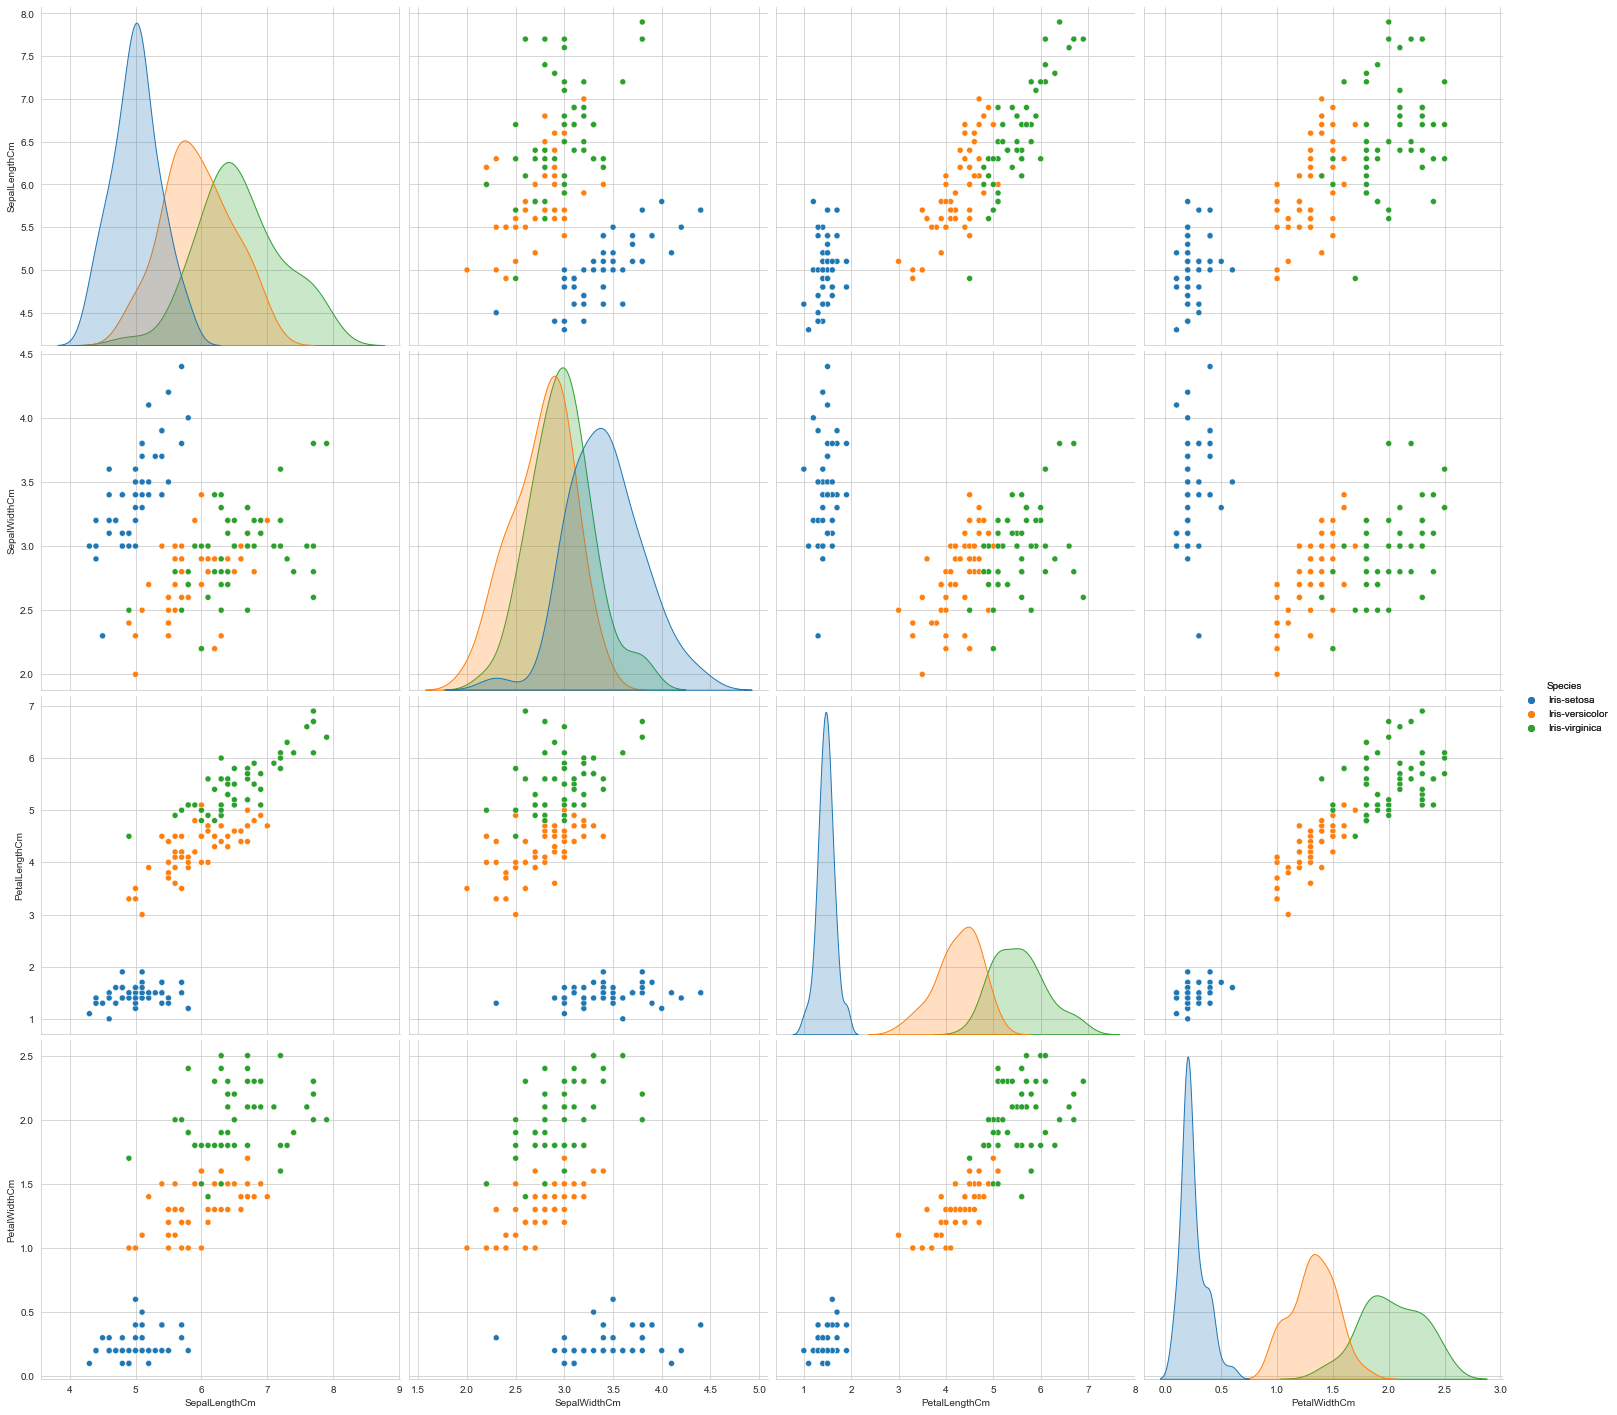

In [56]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue="Species", size=5)\
.add_legend()


#### Observations

- petal_length and petal_width are the most useful features to identify various flower types.

- While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).

- We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

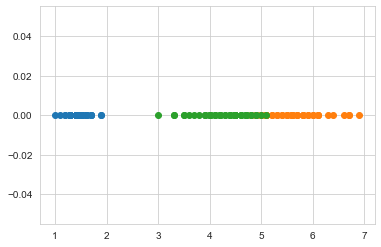

In [69]:
import numpy as np
iris_setosa = iris.loc[iris["Species"] == "Iris-setosa"];
iris_virginica = iris.loc[iris["Species"] == "Iris-virginica"];
iris_versicolor = iris.loc[iris["Species"] == "Iris-versicolor"];
plt.plot(iris_setosa["PetalLengthCm"],np.zeros_like(iris_setosa['PetalLengthCm']),'o')
plt.plot(iris_virginica["PetalLengthCm"],np.zeros_like(iris_virginica['PetalLengthCm']),'o')
plt.plot(iris_versicolor["PetalLengthCm"],np.zeros_like(iris_versicolor['PetalLengthCm']),'o')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot`

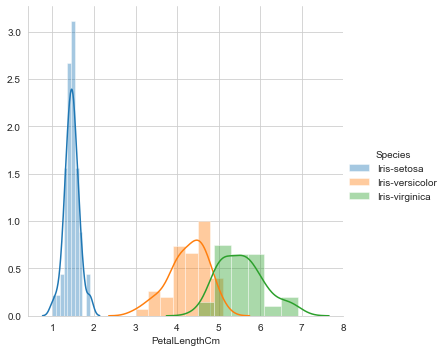

In [67]:
# PDF

sns.set_style("whitegrid")
sns.FacetGrid(iris, hue="Species", size=5)\
.map(sns.distplot, "PetalLengthCm")\
.add_legend()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


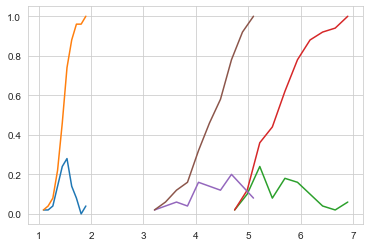

In [84]:
#CDF

# setosa
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# virginica
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# versicolor
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

In [91]:
# Mean

print("Means")
print(np.mean(iris_setosa["PetalLengthCm"]))
print(np.mean(iris_virginica["PetalLengthCm"]))
print(np.mean(iris_versicolor["PetalLengthCm"]))

# Standard Deviation
print("\nStandard Deviation")
print(np.std(iris_setosa["PetalLengthCm"]))
print(np.std(iris_virginica["PetalLengthCm"]))
print(np.std(iris_versicolor["PetalLengthCm"]))

Means
1.464
5.552
4.26

Standard Deviation
0.17176728442867115
0.5463478745268441
0.4651881339845204


In [92]:
# Median
print("Median")
print(np.median(iris_setosa["PetalLengthCm"]))
print(np.median(iris_virginica["PetalLengthCm"]))
print(np.median(iris_versicolor["PetalLengthCm"]))

Median
1.5
5.55
4.35


In [98]:
# quantile
print("Quantile")
print(np.percentile(iris_setosa["PetalLengthCm"],np.arange(0,100,25)))
print(np.percentile(iris_virginica["PetalLengthCm"],np.arange(0,100,25)))
print(np.percentile(iris_versicolor["PetalLengthCm"],np.arange(0,100,25)))
print("\n")
print(np.percentile(iris_setosa["PetalLengthCm"],np.arange(0,100,50)))
print(np.percentile(iris_virginica["PetalLengthCm"],np.arange(0,100,50)))
print(np.percentile(iris_versicolor["PetalLengthCm"],np.arange(0,100,50)))

print("\n")
# 90th percentile
print("90th percentile")
print(np.percentile(iris_setosa["PetalLengthCm"],np.arange(0,100,90)))
print(np.percentile(iris_virginica["PetalLengthCm"],np.arange(0,100,90)))
print(np.percentile(iris_versicolor["PetalLengthCm"],np.arange(0,100,90)))

Quantile
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]


[1.  1.5]
[4.5  5.55]
[3.   4.35]


90th percentile
[1.  1.7]
[4.5  6.31]
[3.  4.8]


In [101]:
# Median Absolute Deviation
print("Median Absolute Deviation")
from statsmodels import robust
print(robust.mad(iris_setosa["PetalLengthCm"]))
print(robust.mad(iris_virginica["PetalLengthCm"]))
print(robust.mad(iris_versicolor["PetalLengthCm"]))

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


Boxplot and whiskers


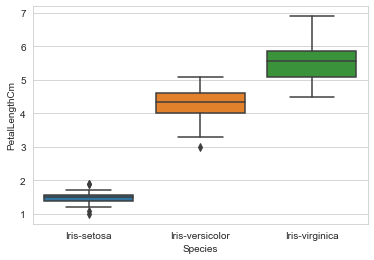

In [104]:
# Boxplot and whiskers
print("Boxplot and whiskers")
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)
plt.show()

Violin Plot


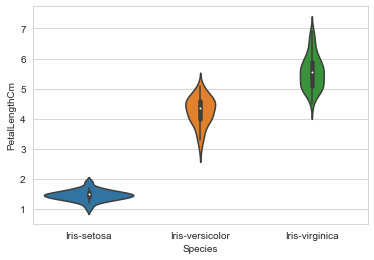

In [105]:
# Violin Plot
print("Violin Plot")
sns.violinplot(x='Species', y='PetalLengthCm', data=iris)
plt.show()

Contour Plot


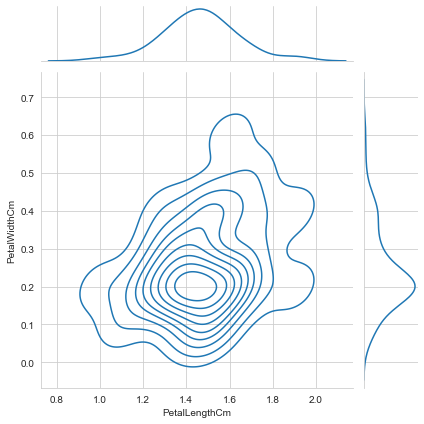

In [108]:
# Contour  Plot
print("Contour Plot")
sns.jointplot(x='PetalLengthCm', y='PetalWidthCm', data=iris_setosa, kind="kde")
plt.show()